# MICROSOFT

**The code includes the following:**

*Data Cleaning* – Loading and preparing actual stock price data.

*Training Models* – Forecasting Amazon stock prices using various models (LSTM, BiLSTM, Lasso Regression, Random Forest, ARIMA).

*Model Comparison* – Comparing different forecasting models based on evaluation metrics.

*Model Evaluation* – Computing and analyzing Pearson correlation, Spearman correlation, RMSE, MAE, and MAPE.

*Data Visualization* – Plotting actual vs. forecasted prices to visually assess model performance.



In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import pearsonr, spearmanr

In [3]:
# Loading dataset
msft_data = pd.read_csv("full_complete_datasets/MSFT_raw_complete_data.csv")

C:\Users\ekf98\AppData\Local\Temp\ipykernel_3648\1839410230.py:2: DtypeWarning: Columns (69,81,93,105,117,129,141,155,169) have mixed types. Specify dtype option on import or set low_memory=False.
  msft_data = pd.read_csv("full_complete_datasets/MSFT_raw_complete_data.csv")


In [4]:
# Filter the dataset
msft_data['date'] = pd.to_datetime(msft_data['date'])
msft = msft_data[msft_data['date'] >= '1999-01-22']

In [11]:
# Function to calculate percentage of missing values
def null_percentage_report(df):
  null_percentage = df.isnull().sum() / len(df) * 100
  return null_percentage[null_percentage != 0]

In [12]:
null_percentage_report(msft)

sector                                      3.730463
exchange                                    3.730463
pe                                          3.730463
basicMaterialsChangesPercentage           100.000000
communicationServicesChangesPercentage     25.729873
                                             ...    
williams                                    0.029490
wma                                         0.029490
MSFT_press_release_sentiment                0.014745
MSFT_twitter_social_sentiment              99.071070
NVDA_twitter_social_sentiment              99.071070
Length: 144, dtype: float64

In [9]:
# Remove duplicatees
print(f"before removing: ", len(msft))
msft_filtered = msft.drop_duplicates()
print(f"after removing: ", len(msft_filtered))

before removing:  6782
after removing:  6660


In [11]:
# Filling in missing values
msft_filtered['symbol'] = msft_filtered['symbol'].fillna('MSFT')
msft_filtered['sector'] = msft_filtered['sector'].fillna('Technology')
msft_filtered['exchange'] = msft_filtered['exchange'].fillna('NASDAQ')

<ipython-input-11-26e5839b394b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  msft_filtered['symbol'] = msft_filtered['symbol'].fillna('MSFT')
<ipython-input-11-26e5839b394b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  msft_filtered['sector'] = msft_filtered['sector'].fillna('Technology')
<ipython-input-11-26e5839b394b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [14]:
# Filling in missing values
columns_to_fill = ['sma', 'adx', 'dema', 'ema', 'rsi', 'standardDeviation', 'tema', 'williams', 'wma', 'month1', 'month2', 'month3', 'month6', 'year1', 'year2', 'year3', 'year5', 'year7', 'year10','year20', 'year30', 'inflationRate']
msft_filtered[columns_to_fill] = msft_filtered[columns_to_fill].fillna(msft_filtered[columns_to_fill].mean())

<ipython-input-14-b04d7cc5d377>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  msft_filtered[columns_to_fill] = msft_filtered[columns_to_fill].fillna(msft_filtered[columns_to_fill].mean())


In [ ]:
# List of columns to drop
columns_to_drop = [
    'CADUSD_open', 'CADUSD_high', 'CADUSD_low', 'CADUSD_close', 'CADUSD_adjClose',
    'CADUSD_traded_volume', 'CADUSD_unadjusted_traded_Volume', 'CADUSD_change',
    'CADUSD_changePercent', 'CADUSD_vwap', 'CADUSD_label', 'CADUSD_changeOverTime',

    'CHFUSD_open', 'CHFUSD_high', 'CHFUSD_low', 'CHFUSD_close', 'CHFUSD_adjClose',
    'CHFUSD_traded_volume', 'CHFUSD_unadjusted_traded_Volume', 'CHFUSD_change',
    'CHFUSD_changePercent', 'CHFUSD_vwap', 'CHFUSD_label', 'CHFUSD_changeOverTime',

    'CNHUSD_open', 'CNHUSD_high', 'CNHUSD_low', 'CNHUSD_close', 'CNHUSD_adjClose',
    'CNHUSD_traded_volume', 'CNHUSD_unadjusted_traded_Volume', 'CNHUSD_change',
    'CNHUSD_changePercent', 'CNHUSD_vwap', 'CNHUSD_label', 'CNHUSD_changeOverTime',

    'KRWUSD_open', 'KRWUSD_high', 'KRWUSD_low', 'KRWUSD_close', 'KRWUSD_adjClose',
    'KRWUSD_traded_volume', 'KRWUSD_unadjusted_traded_Volume', 'KRWUSD_change',
    'KRWUSD_changePercent', 'KRWUSD_vwap', 'KRWUSD_label', 'KRWUSD_changeOverTime',

    'EURUSD_open', 'EURUSD_high', 'EURUSD_low', 'EURUSD_close', 'EURUSD_adjClose',
    'EURUSD_traded_volume', 'EURUSD_unadjusted_traded_Volume', 'EURUSD_change',
    'EURUSD_changePercent', 'EURUSD_vwap', 'EURUSD_label', 'EURUSD_changeOverTime',

    'GBPUSD_open', 'GBPUSD_high', 'GBPUSD_low', 'GBPUSD_close', 'GBPUSD_adjClose',
    'GBPUSD_traded_volume', 'GBPUSD_unadjusted_traded_Volume', 'GBPUSD_change',
    'GBPUSD_changePercent', 'GBPUSD_vwap', 'GBPUSD_label', 'GBPUSD_changeOverTime',

    'JPYUSD_open', 'JPYUSD_high', 'JPYUSD_low', 'JPYUSD_close', 'JPYUSD_adjClose',
    'JPYUSD_traded_volume', 'JPYUSD_unadjusted_traded_Volume', 'JPYUSD_change',
    'JPYUSD_changePercent', 'JPYUSD_vwap', 'JPYUSD_label', 'JPYUSD_changeOverTime',
    'NVDA_twitter_social_sentiment', 'MSFT_twitter_social_sentiment',
    'financialServicesChangesPercentage', 'basicMaterialsChangesPercentage',
    'Lithium_price', 'Lithium_open', 'Lithium_volume', 'Lithium_close'
]

# Drop the columns
msft_filtered.drop(columns=columns_to_drop, inplace=True, errors='ignore')

<ipython-input-16-00505da6a719>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  msft_filtered.drop(columns=columns_to_drop, inplace=True, errors='ignore')


In [20]:
# Apply backfill to the columns
columns_to_fill = [
    'communicationServicesChangesPercentage',
    'consumerCyclicalChangesPercentage',
    'consumerDefensiveChangesPercentage',
    'energyChangesPercentage',
    'healthcareChangesPercentage',
    'industrialsChangesPercentage',
    'realEstateChangesPercentage',
    'technologyChangesPercentage',
    'utilitiesChangesPercentage',
    "inflationRate", "Palladium_price", "Palladium_volume", "Palladium_open", "Palladium_close",
    "Copper_price", "Copper_volume", "Copper_open", "Copper_close",
    "Silver_price", "Silver_volume", "Silver_open", "Silver_close",
    "Gold_price", "Gold_volume", "Gold_open", "Gold_close", "pe"
]
msft_filtered[columns_to_fill] = msft_filtered[columns_to_fill].bfill()

<ipython-input-20-004689c9f076>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  msft_filtered[columns_to_fill] = msft_filtered[columns_to_fill].bfill()


In [21]:
null_percentage_report(msft_filtered)

,0
MSFT_press_release_sentiment,0.015015


In [22]:
# Function to replace invalid sentiment values
def replace_sorry_values(row):
    valid_sentiments = {'neutral', 'strongly_positive', 'weakly_positive', 'strongly_negative', 'weakly_negative'}

    def handle_sentiment(primary, secondary):
        if str(row[primary]).startswith(("i'm sorry", "i'm unable", "i am unable")):
            row[primary] = row[secondary] if str(row[secondary]).lower() not in {"i'm sorry", "i'm unable", "i am unable"} else max(row[primary], row[secondary])
        if str(row[primary]).lower() not in valid_sentiments and str(row[secondary]).lower() in valid_sentiments:
            row[primary] = row[secondary]

    # Apply the handling function to both NVDA and AMZN columns
    handle_sentiment('NVDA_stock_news_sentiment', 'NVDA_press_release_sentiment')
    handle_sentiment('NVDA_press_release_sentiment', 'NVDA_stock_news_sentiment')
    handle_sentiment('MSFT_stock_news_sentiment', 'MSFT_press_release_sentiment')
    handle_sentiment('MSFT_press_release_sentiment', 'MSFT_stock_news_sentiment')

    return row

msft_filtered = msft_filtered.apply(replace_sorry_values, axis=1)


## Data Transformation

In [23]:
# Checking which featutres are numerical
num_cols = list(msft_filtered.select_dtypes(include = ['int64', 'float64']).columns)
num_cols

['MSFT_close',
 'MSFT_high',
 'MSFT_low',
 'MSFT_open',
 'MSFT_traded_volume',
 'MSFT_adjClose',
 'MSFT_adjLow',
 'MSFT_adjOpen',
 'MSFT_adj_traded_volume',
 'MSFT_divCash',
 'MSFT_splitFactor',
 'pe',
 'communicationServicesChangesPercentage',
 'consumerCyclicalChangesPercentage',
 'consumerDefensiveChangesPercentage',
 'energyChangesPercentage',
 'healthcareChangesPercentage',
 'industrialsChangesPercentage',
 'realEstateChangesPercentage',
 'technologyChangesPercentage',
 'utilitiesChangesPercentage',
 'month1',
 'month2',
 'month3',
 'month6',
 'year1',
 'year2',
 'year3',
 'year5',
 'year7',
 'year10',
 'year20',
 'year30',
 'inflationRate',
 'Palladium_price',
 'Palladium_volume',
 'Palladium_open',
 'Palladium_close',
 'Copper_price',
 'Copper_volume',
 'Copper_open',
 'Copper_close',
 'Silver_price',
 'Silver_volume',
 'Silver_open',
 'Silver_close',
 'Gold_price',
 'Gold_volume',
 'Gold_open',
 'Gold_close',
 'sma',
 'adx',
 'dema',
 'ema',
 'rsi',
 'standardDeviation',
 'tema

In [24]:
# Dropping irrelevant columns
columns_to_drop = ['sector', 'exchange', 'symbol']
msft_filtered = msft_filtered.drop(columns_to_drop, axis=1)

In [25]:
# Checking which features are categorical
ohe_cols = list(msft_filtered.select_dtypes(include = ["category", "object"]).columns)
ohe_cols

['MSFT_stock_news_sentiment',
 'MSFT_press_release_sentiment',
 'NVDA_stock_news_sentiment',
 'NVDA_press_release_sentiment']

In [26]:
# List of columns to apply one-hot encoding
columns_to_encode = [
    'MSFT_stock_news_sentiment',
    'MSFT_press_release_sentiment',
    'NVDA_stock_news_sentiment',
    'NVDA_press_release_sentiment'
]

# Use get_dummies to one-hot encode the specified columns
msft_filtered = pd.get_dummies(msft_filtered, columns=columns_to_encode, drop_first=True)

In [27]:
# Checking which features are categorical
all_columns = list(msft_filtered.columns)
all_columns

['date',
 'MSFT_close',
 'MSFT_high',
 'MSFT_low',
 'MSFT_open',
 'MSFT_traded_volume',
 'MSFT_adjClose',
 'MSFT_adjLow',
 'MSFT_adjOpen',
 'MSFT_adj_traded_volume',
 'MSFT_divCash',
 'MSFT_splitFactor',
 'pe',
 'communicationServicesChangesPercentage',
 'consumerCyclicalChangesPercentage',
 'consumerDefensiveChangesPercentage',
 'energyChangesPercentage',
 'healthcareChangesPercentage',
 'industrialsChangesPercentage',
 'realEstateChangesPercentage',
 'technologyChangesPercentage',
 'utilitiesChangesPercentage',
 'month1',
 'month2',
 'month3',
 'month6',
 'year1',
 'year2',
 'year3',
 'year5',
 'year7',
 'year10',
 'year20',
 'year30',
 'inflationRate',
 'Palladium_price',
 'Palladium_volume',
 'Palladium_open',
 'Palladium_close',
 'Copper_price',
 'Copper_volume',
 'Copper_open',
 'Copper_close',
 'Silver_price',
 'Silver_volume',
 'Silver_open',
 'Silver_close',
 'Gold_price',
 'Gold_volume',
 'Gold_open',
 'Gold_close',
 'sma',
 'adx',
 'dema',
 'ema',
 'rsi',
 'standardDeviation

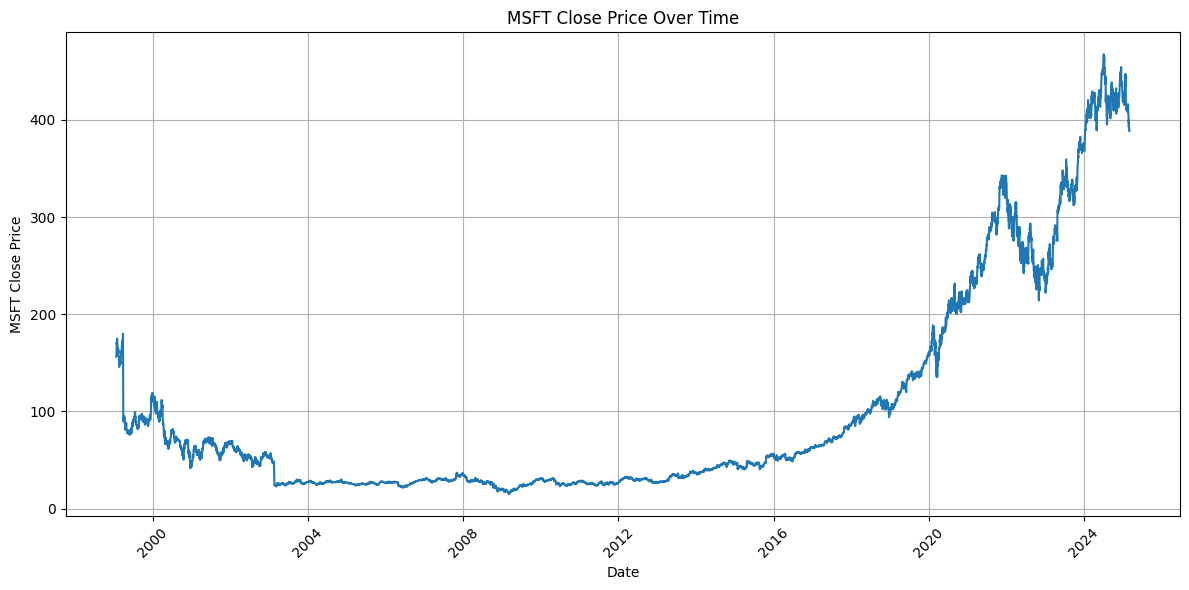

In [28]:
# Plot for closing price of Microsoft (MSFT) over time
plt.figure(figsize=(12, 6))
plt.plot(msft_filtered['date'], msft_filtered['MSFT_close'])
plt.xlabel('Date')
plt.ylabel('MSFT Close Price')
plt.title('MSFT Close Price Over Time')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Save the updated DataFrame to CSV
msft_filtered.to_csv('msft_filtered.csv', index=False)

## LSTM

           date  MSFT_close  MSFT_high  MSFT_low  MSFT_open  \
3278 1999-01-22      156.25     160.23    155.25     155.63   
3279 1999-01-25      161.88     163.31    159.13     161.69   
3280 1999-01-26      171.56     171.75    164.50     165.50   
3281 1999-01-27      168.63     174.44    168.50     172.50   
3282 1999-01-28      174.00     174.06    169.81     171.75   

      MSFT_traded_volume  MSFT_adjClose  MSFT_adjLow  MSFT_adjOpen  \
3278            20540000      24.040600    23.886740     23.945207   
3279            25769100      24.906831    24.483716     24.877597   
3280            30050800      26.396194    25.309944     25.463803   
3281            24512000      25.945385    25.925383     26.540822   
3282            19709600      26.771612    26.126939     26.425427   

      MSFT_adj_traded_volume  MSFT_divCash  MSFT_splitFactor         pe  \
3278                82160000           0.0               1.0  75.925539   
3279               103076400           0.0        

<ipython-input-37-6cfad35cfeb3>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date'] = pd.to_datetime(data['date'])
<ipython-input-37-6cfad35cfeb3>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['day_of_week'] = data['date'].dt.dayofweek
<ipython-input-37-6cfad35cfeb3>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

165/165 ━━━━━━━━━━━━━━━━━━━━ 15s 67ms/step - loss: 0.0013 - val_loss: 5.3711e-04
Epoch 2/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 21s 72ms/step - loss: 8.3716e-05 - val_loss: 4.6865e-04
Epoch 3/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 20s 67ms/step - loss: 7.1855e-05 - val_loss: 0.0018
Epoch 4/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 21s 71ms/step - loss: 6.8849e-05 - val_loss: 9.4882e-04
Epoch 5/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 11s 64ms/step - loss: 6.6908e-05 - val_loss: 6.2001e-04
Epoch 6/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 24s 84ms/step - loss: 5.6846e-05 - val_loss: 7.0149e-04
Epoch 7/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 11s 68ms/step - loss: 6.1140e-05 - val_loss: 8.8020e-04
Epoch 8/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 12s 72ms/step - loss: 5.8918e-05 - val_loss: 3.3488e-04
Epoch 9/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 19s 60ms/step - loss: 5.6506e-05 - val_loss: 5.4706e-04
Epoch 10/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 11s 68ms/step - loss: 6.2016e-05 - val_loss: 7.3194e-04
Epoch 11/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 11s 68ms/step - l

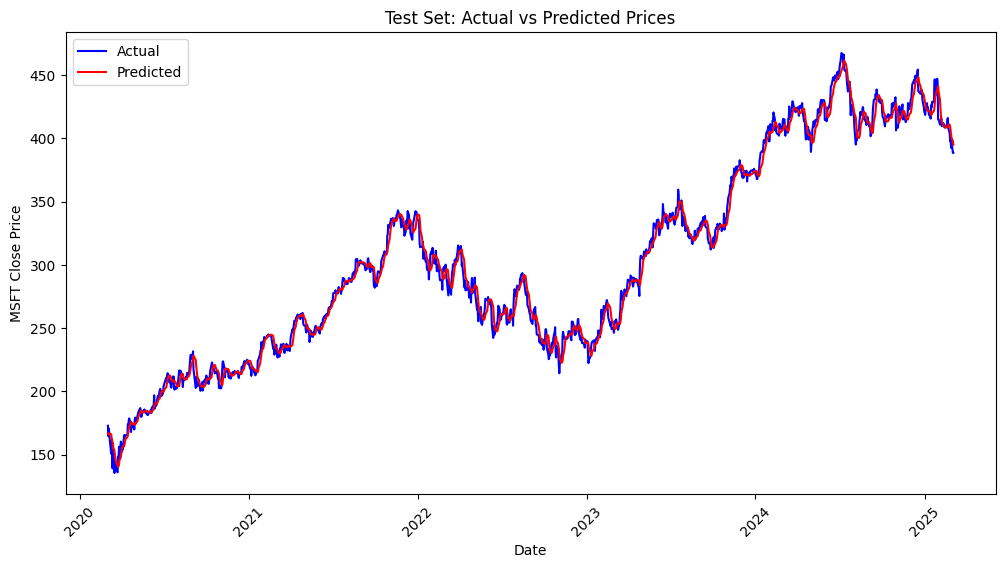

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


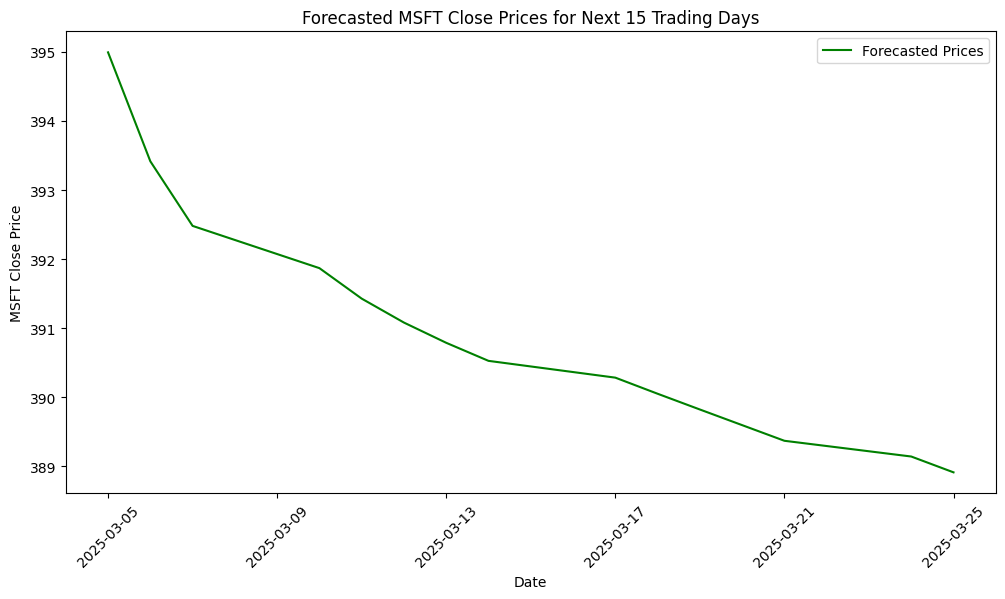

In [37]:
np.random.seed(42)
data_msft = msft_filtered.copy()
data = data_msft.loc[:, ~data_msft.columns.str.contains('NVDA')]
data['date'] = pd.to_datetime(data['date'])

# Extract date-related features
data['day_of_week'] = data['date'].dt.dayofweek
data['month'] = data['date'].dt.month
data['quarter'] = data['date'].dt.quarter
data['year'] = data['date'].dt.year
data['date_unix'] = data['date'].astype('int64') // 10**9

# Scale the entire data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data[['MSFT_close']])
data['MSFT_close_scaled'] = data_scaled

# Split data into train and test
split_date = np.quantile(data['date_unix'], 0.8)
train_data = data[data['date_unix'] <= split_date]
test_data = data[data['date_unix'] > split_date]

# Create sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 60

train_scaled = train_data[['MSFT_close_scaled']].values
test_scaled = test_data[['MSFT_close_scaled']].values

X_train, y_train = create_sequences(train_scaled, seq_length)
X_test, y_test = create_sequences(test_scaled, seq_length)

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Define LSTM Model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(seq_length, 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Predictions on the test set
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Test RMSE: {rmse}')

# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
sns.lineplot(x=test_data['date'].iloc[seq_length:], y=y_test.flatten(), label='Actual', color='blue')
sns.lineplot(x=test_data['date'].iloc[seq_length:], y=y_pred.flatten(), label='Predicted', color='red')
plt.xlabel("Date")
plt.ylabel("MSFT Close Price")
plt.title("Test Set: Actual vs Predicted Prices")
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Forecast the next 14 days
future_predictions = []
input_seq = X_test[-1].reshape(1, seq_length, 1)

for _ in range(15):
    pred = model.predict(input_seq)[0, 0]
    future_predictions.append(pred)
    new_seq = np.append(input_seq[:, 1:, :], [[[pred]]], axis=1)
    input_seq = new_seq

# Convert forecasted values back to original scale
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1)).flatten()

# Create future dates
date_range = pd.date_range(start=pd.to_datetime(test_data['date'].max()) + pd.Timedelta(days=1), periods=15, freq='B')

# Plot forecasted prices
plt.figure(figsize=(12, 6))
sns.lineplot(x=date_range, y=future_predictions, label='Forecasted Prices', color='green')
plt.xlabel("Date")
plt.ylabel("MSFT Close Price")
plt.title("Forecasted MSFT Close Prices for Next 15 Trading Days")
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [38]:
# Create a DataFrame for LSTM forecasted prices and save it as a CSV file.
lstm_msft_forecast = pd.DataFrame({'Date': date_range, 'Forecasted Close Price': future_predictions})
print(lstm_msft_forecast)
lstm_msft_forecast.to_csv('lstm_msft_forecast.csv', index=False)

         Date  Forecasted Close Price
0  2025-03-05              394.994263
1  2025-03-06              393.416260
2  2025-03-07              392.480286
3  2025-03-10              391.868225
4  2025-03-11              391.426758
5  2025-03-12              391.079620
6  2025-03-13              390.786591
7  2025-03-14              390.525146
8  2025-03-17              390.282013
9  2025-03-18              390.048828
10 2025-03-19              389.820557
11 2025-03-20              389.594025
12 2025-03-21              389.367340
13 2025-03-24              389.139496
14 2025-03-25              388.910187


## BiLSTM

           date  MSFT_close  MSFT_high  MSFT_low  MSFT_open  \
3278 1999-01-22      156.25     160.23    155.25     155.63   
3279 1999-01-25      161.88     163.31    159.13     161.69   
3280 1999-01-26      171.56     171.75    164.50     165.50   
3281 1999-01-27      168.63     174.44    168.50     172.50   
3282 1999-01-28      174.00     174.06    169.81     171.75   

      MSFT_traded_volume  MSFT_adjClose  MSFT_adjLow  MSFT_adjOpen  \
3278            20540000      24.040600    23.886740     23.945207   
3279            25769100      24.906831    24.483716     24.877597   
3280            30050800      26.396194    25.309944     25.463803   
3281            24512000      25.945385    25.925383     26.540822   
3282            19709600      26.771612    26.126939     26.425427   

      MSFT_adj_traded_volume  MSFT_divCash  MSFT_splitFactor         pe  \
3278                82160000           0.0               1.0  75.925539   
3279               103076400           0.0        

<ipython-input-41-a2d638fdc7a6>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date'] = pd.to_datetime(data['date'])
<ipython-input-41-a2d638fdc7a6>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['day_of_week'] = data['date'].dt.dayofweek
<ipython-input-41-a2d638fdc7a6>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

Epoch 1/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 39s 178ms/step - loss: 7.0612e-04 - val_loss: 5.1616e-04
Epoch 2/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 32s 198ms/step - loss: 8.6729e-05 - val_loss: 7.9018e-04
Epoch 3/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 37s 172ms/step - loss: 8.7519e-05 - val_loss: 0.0021
Epoch 4/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 41s 172ms/step - loss: 7.0242e-05 - val_loss: 6.4125e-04
Epoch 5/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 41s 174ms/step - loss: 8.3816e-05 - val_loss: 4.4358e-04
Epoch 6/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 43s 188ms/step - loss: 6.1124e-05 - val_loss: 8.3928e-04
Epoch 7/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 39s 175ms/step - loss: 6.8848e-05 - val_loss: 6.3061e-04
Epoch 8/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 41s 174ms/step - loss: 7.3567e-05 - val_loss: 6.2176e-04
Epoch 9/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 42s 181ms/step - loss: 6.5850e-05 - val_loss: 0.0011
Epoch 10/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 42s 190ms/step - loss: 6.0746e-05 - val_loss: 9.7669e-04
Epoch 11/20
164/164 ━━━━━━━━━━━━━━━━━

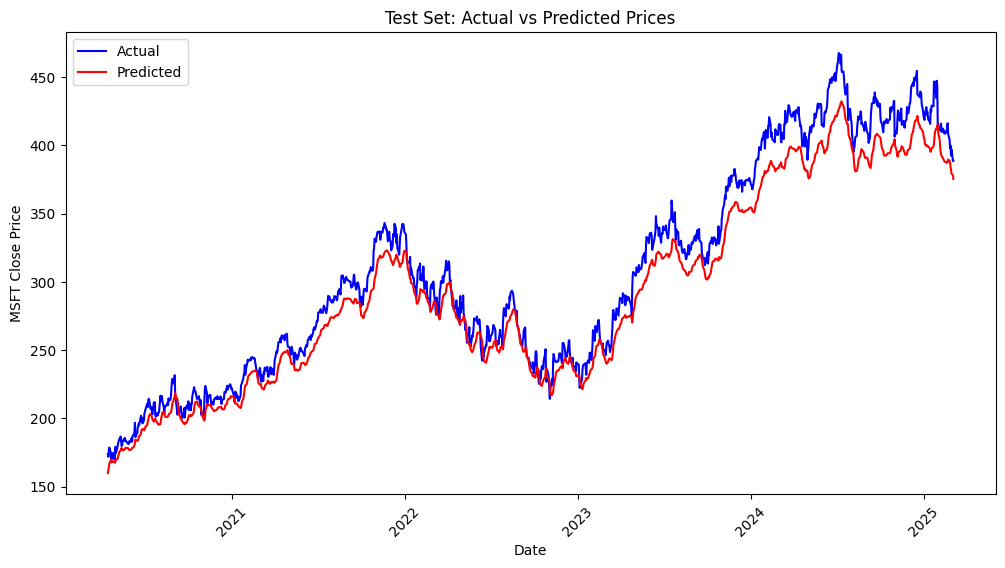

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


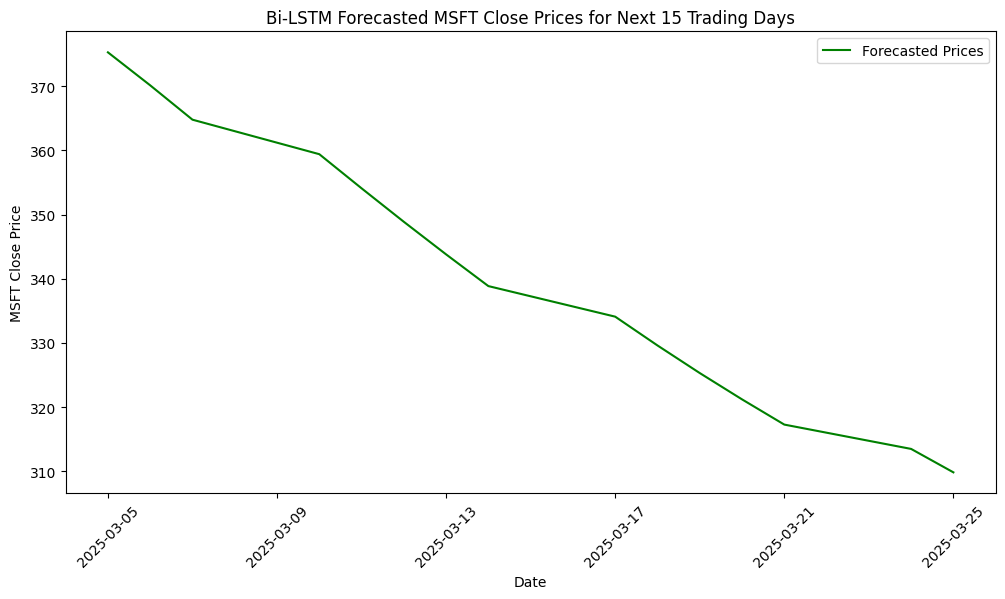

In [41]:
np.random.seed(42)
data_msft = msft_filtered.copy()
data = data_msft.loc[:, ~data_msft.columns.str.contains('NVDA')]
data['date'] = pd.to_datetime(data['date'])

# Extract date-related features
data['day_of_week'] = data['date'].dt.dayofweek
data['month'] = data['date'].dt.month
data['quarter'] = data['date'].dt.quarter
data['year'] = data['date'].dt.year
data['date_unix'] = data['date'].astype('int64') // 10**9

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data[['MSFT_close']])
data['MSFT_close_scaled'] = data_scaled

# Split data into train and test
split_date = np.quantile(data['date_unix'], 0.8)
train_data = data[data['date_unix'] <= split_date]
test_data = data[data['date_unix'] > split_date]

# Create sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 90

train_scaled = train_data[['MSFT_close_scaled']].values
test_scaled = test_data[['MSFT_close_scaled']].values

X_train, y_train = create_sequences(train_scaled, seq_length)
X_test, y_test = create_sequences(test_scaled, seq_length)

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Define Bidirectional LSTM Model
model = Sequential([
    Bidirectional(LSTM(50, return_sequences=True), input_shape=(seq_length, 1)),
    Dropout(0.3),
    Bidirectional(LSTM(50, return_sequences=False)),
    Dropout(0.3),
    Dense(25),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Predictions on the test set
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Test RMSE: {rmse}')

# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
sns.lineplot(x=test_data['date'].iloc[seq_length:], y=y_test.flatten(), label='Actual', color='blue')
sns.lineplot(x=test_data['date'].iloc[seq_length:], y=y_pred.flatten(), label='Predicted', color='red')
plt.xlabel("Date")
plt.ylabel("MSFT Close Price")
plt.title("Test Set: Actual vs Predicted Prices")
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Forecast the next 14 days
future_predictions = []
input_seq = X_test[-1].reshape(1, seq_length, 1)

for _ in range(15):
    pred = model.predict(input_seq)[0, 0]
    future_predictions.append(pred)
    new_seq = np.append(input_seq[:, 1:, :], [[[pred]]], axis=1)
    input_seq = new_seq
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1)).flatten()
date_range = pd.date_range(start=pd.to_datetime(test_data['date'].max()) + pd.Timedelta(days=1), periods=15, freq='B')

# Plot forecasted prices
plt.figure(figsize=(12, 6))
sns.lineplot(x=date_range, y=future_predictions, label='Forecasted Prices', color='green')
plt.xlabel("Date")
plt.ylabel("MSFT Close Price")
plt.title("Bi-LSTM Forecasted MSFT Close Prices for Next 15 Trading Days")
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [42]:
# Create a DataFrame for BiLSTM forecasted prices and save it as a CSV file.
bilstm_msft_forecast = pd.DataFrame({'Date': date_range, 'Forecasted Close Price': future_predictions})
print(bilstm_msft_forecast)
bilstm_msft_forecast.to_csv('bilstm_msft_forecast.csv', index=False)

         Date  Forecasted Close Price
0  2025-03-05              375.252594
1  2025-03-06              370.114075
2  2025-03-07              364.766205
3  2025-03-10              359.392639
4  2025-03-11              354.078644
5  2025-03-12              348.864136
6  2025-03-13              343.789307
7  2025-03-14              338.850769
8  2025-03-17              334.090942
9  2025-03-18              329.607727
10 2025-03-19              325.309875
11 2025-03-20              321.211426
12 2025-03-21              317.283875
13 2025-03-24              313.495117
14 2025-03-25              309.846863


## Lasso

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.151e+03, tolerance: 4.555e+02
  model = cd_fast.enet_coordinate_descent(


Test RMSE: 10.271981337166203


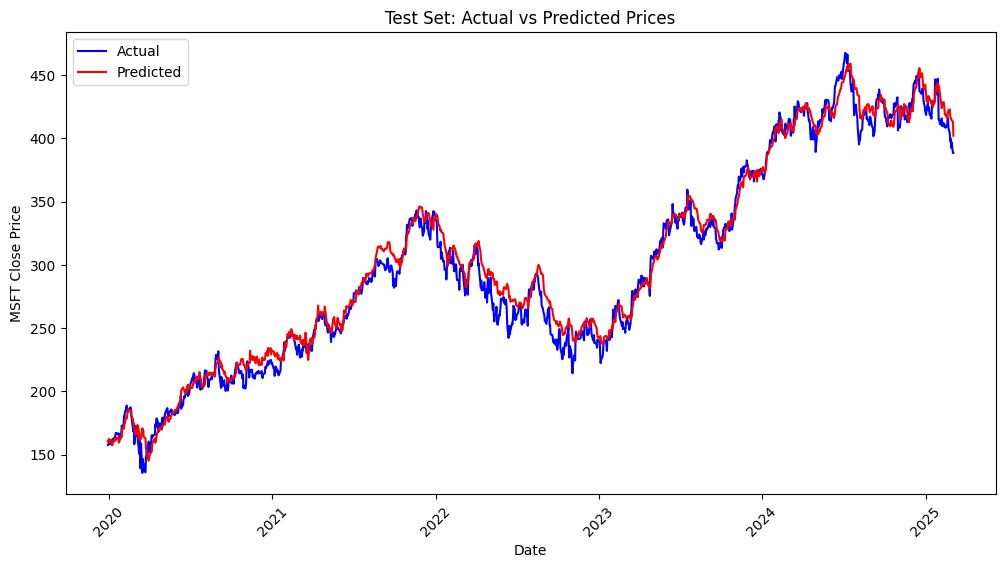

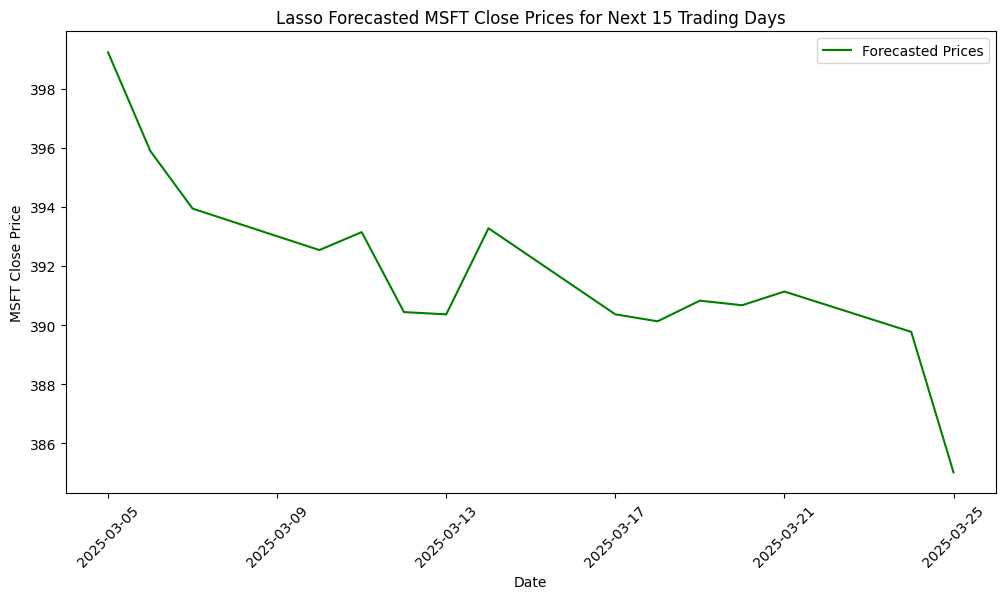

In [44]:
np.random.seed(42)
data = msft_filtered.copy()
data = data.loc[:, ~data.columns.str.contains('NVDA')]
data = data.dropna(subset=['MSFT_close'])
data['date'] = pd.to_datetime(data['date'])
y = data['MSFT_close']
X = data.drop(columns=['date', 'MSFT_close'])
X = X.fillna(X.median())

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=data.index)

sequence_length = 90
future_days = 15

X_seq, y_seq = [], []

for i in range(len(X_scaled_df) - sequence_length):
    X_seq.append(X_scaled_df.iloc[i:i + sequence_length].values)
    y_seq.append(y.iloc[i + sequence_length])

X_seq = np.array(X_seq)
y_seq = np.array(y_seq)

# Train-test split
train_size = int(0.8 * len(X_seq))
X_train, X_test = X_seq[:train_size], X_seq[train_size:]
y_train, y_test = y_seq[:train_size], y_seq[train_size:]

# Flatten sequences for Lasso
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

alpha_value = 0.001

# Train Lasso model
lasso = Lasso(alpha=alpha_value)
lasso.fit(X_train_flat, y_train)

# Compute RMSE for the test set predictions
y_pred = lasso.predict(X_test_flat)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Test RMSE: {rmse}')

# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
sns.lineplot(x=data['date'].iloc[train_size+sequence_length:], y=y_test.flatten(), label='Actual', color='blue')
sns.lineplot(x=data['date'].iloc[train_size+sequence_length:], y=y_pred.flatten(), label='Predicted', color='red')
plt.xlabel("Date")
plt.ylabel("MSFT Close Price")
plt.title("Test Set: Actual vs Predicted Prices")
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Forecast next 15 trading days
last_known_sequence = X_scaled_df.iloc[-sequence_length:].values
future_predictions = []
future_dates = []
current_date = data['date'].iloc[-1]

while len(future_predictions) < future_days:
    current_date += pd.Timedelta(days=1)
    if current_date.weekday() >= 5:
        continue
    input_seq = last_known_sequence.reshape(1, -1)
    pred = lasso.predict(input_seq)[0]
    future_predictions.append(pred)
    future_dates.append(current_date)
    new_row = np.roll(last_known_sequence, -1, axis=0)
    new_row[-1] = last_known_sequence[-1]
    last_known_sequence = new_row

# Plot forecasted prices
plt.figure(figsize=(12, 6))
sns.lineplot(x=future_dates, y=future_predictions, label='Forecasted Prices', color='green')
plt.xlabel("Date")
plt.ylabel("MSFT Close Price")
plt.title("Lasso Forecasted MSFT Close Prices for Next 15 Trading Days")
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [45]:
# Create a DataFrame for Lasso forecasted prices and save it as a CSV file.
lasso_msft_forecast = pd.DataFrame({'Date': date_range, 'Forecasted Close Price': future_predictions})
print(lasso_msft_forecast)
lasso_msft_forecast.to_csv('lasso_msft_forecast.csv', index=False)

         Date  Forecasted Close Price
0  2025-03-05              399.233101
1  2025-03-06              395.894411
2  2025-03-07              393.942909
3  2025-03-10              392.539926
4  2025-03-11              393.147393
5  2025-03-12              390.439922
6  2025-03-13              390.363412
7  2025-03-14              393.277487
8  2025-03-17              390.362938
9  2025-03-18              390.128411
10 2025-03-19              390.826729
11 2025-03-20              390.671318
12 2025-03-21              391.135372
13 2025-03-24              389.769690
14 2025-03-25              385.014670


## Random Forest

Test RMSE: 174.4920202658189


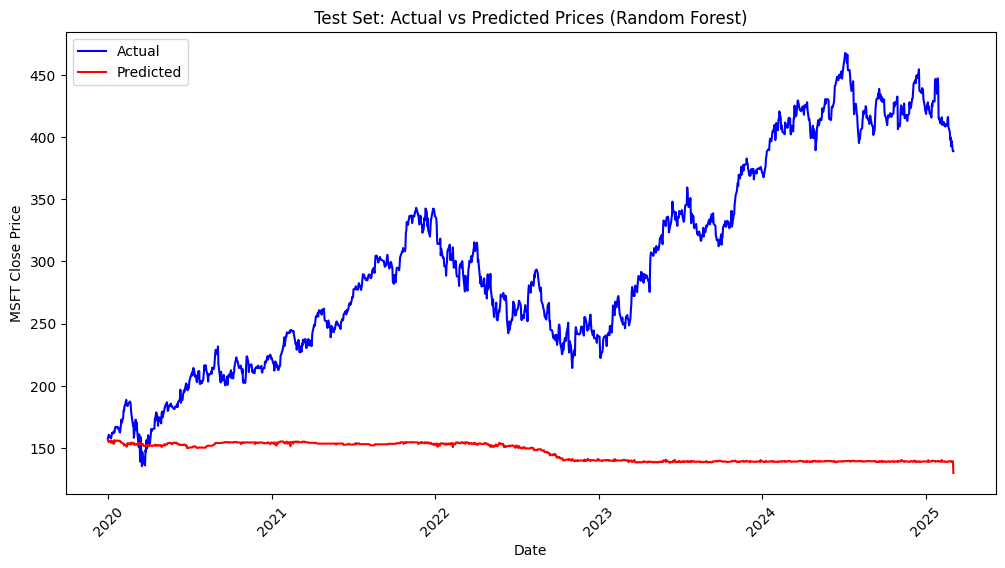

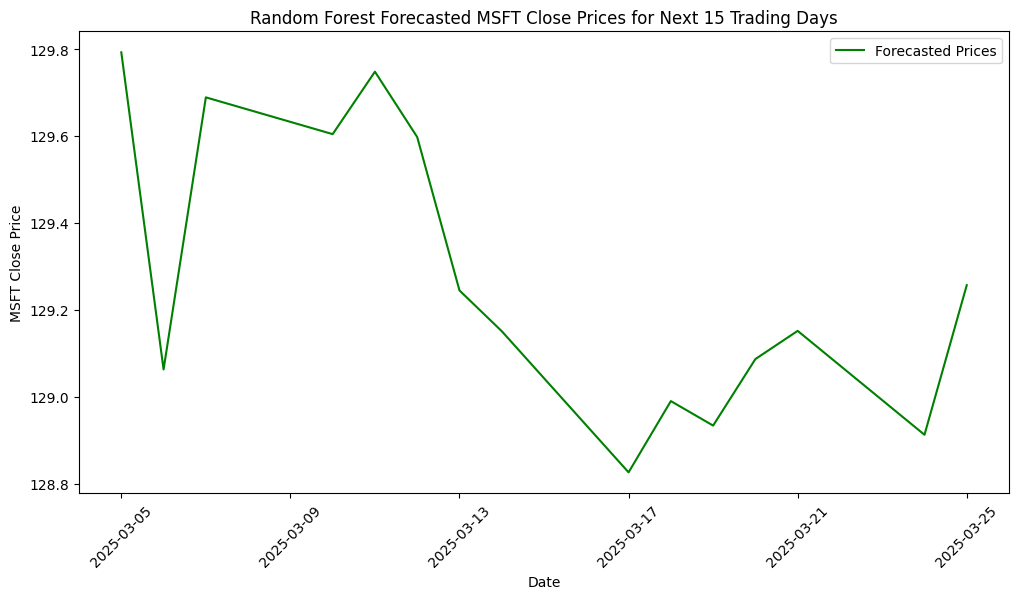

In [47]:
np.random.seed(42)
data = msft_filtered.copy()
data = data.loc[:, ~data.columns.str.contains('NVDA')]
data = data.dropna(subset=['MSFT_close'])
data['date'] = pd.to_datetime(data['date'])

for lag in range(1, 6):
    data[f'MSFT_close_lag{lag}'] = data['MSFT_close'].shift(lag)
data['MSFT_MA5'] = data['MSFT_close'].rolling(window=5).mean()
data['MSFT_MA10'] = data['MSFT_close'].rolling(window=10).mean()
data['MSFT_EMA10'] = data['MSFT_close'].ewm(span=10, adjust=False).mean()
data.dropna(inplace=True)

y = data['MSFT_close']
X = data.drop(columns=['date', 'MSFT_close'])

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=data.index)

sequence_length = 90
future_days = 15

X_seq, y_seq = [], []

for i in range(len(X_scaled_df) - sequence_length):
    X_seq.append(X_scaled_df.iloc[i:i + sequence_length].values)
    y_seq.append(y.iloc[i + sequence_length])

X_seq = np.array(X_seq)
y_seq = np.array(y_seq)

# Train-test split
train_size = int(0.8 * len(X_seq))
X_train, X_test = X_seq[:train_size], X_seq[train_size:]
y_train, y_test = y_seq[:train_size], y_seq[train_size:]

# Flatten sequences for Random Forest
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Train Random Forest model
rf = RandomForestRegressor(n_estimators=20, max_depth=20, min_samples_split=5,
                           min_samples_leaf=2, random_state=42, n_jobs=-1)
rf.fit(X_train_flat, y_train)

# Predict on the test set
y_pred = rf.predict(X_test_flat)

# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Test RMSE: {rmse}')

# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
sns.lineplot(x=data['date'].iloc[train_size+sequence_length:], y=y_test.flatten(), label='Actual', color='blue')
sns.lineplot(x=data['date'].iloc[train_size+sequence_length:], y=y_pred.flatten(), label='Predicted', color='red')
plt.xlabel("Date")
plt.ylabel("MSFT Close Price")
plt.title("Test Set: Actual vs Predicted Prices (Random Forest)")
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Forecast next 15 trading days
last_known_sequence = X_scaled_df.iloc[-sequence_length:].values
future_predictions = []

for _ in range(future_days):
    input_seq = last_known_sequence.reshape(1, -1)
    pred = rf.predict(input_seq)[0]
    future_predictions.append(pred)
    new_row = np.roll(last_known_sequence, -1, axis=0)
    new_row[-1] = last_known_sequence[-1]
    last_known_sequence = new_row
date_range = pd.date_range(start=data['date'].iloc[-1], periods=future_days+1, freq='B')[1:]

# Plot forecasted prices
plt.figure(figsize=(12, 6))
sns.lineplot(x=date_range, y=future_predictions, label='Forecasted Prices', color='green')
plt.xlabel("Date")
plt.ylabel("MSFT Close Price")
plt.title("Random Forest Forecasted MSFT Close Prices for Next 15 Trading Days")
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [48]:
# Create a DataFrame for Random Forest forecasted prices and save it as a CSV file.
rf_msft_forecast = pd.DataFrame({'Date': date_range, 'Forecasted Close Price': future_predictions})
print(rf_msft_forecast)
rf_msft_forecast.to_csv('rf_msft_forecast.csv', index=False)

         Date  Forecasted Close Price
0  2025-03-05              129.792520
1  2025-03-06              129.062619
2  2025-03-07              129.688917
3  2025-03-10              129.604256
4  2025-03-11              129.748010
5  2025-03-12              129.597503
6  2025-03-13              129.244457
7  2025-03-14              129.150767
8  2025-03-17              128.825832
9  2025-03-18              128.989818
10 2025-03-19              128.933457
11 2025-03-20              129.086568
12 2025-03-21              129.151457
13 2025-03-24              128.912296
14 2025-03-25              129.256582


## ARIMA

<ipython-input-79-90ec01f0391f>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date'] = pd.to_datetime(data['date'])
<ipython-input-79-90ec01f0391f>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date_unix'] = data['date'].astype('int64') // 10**9
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, fr

ARIMA Test RMSE: 48.794498243055614


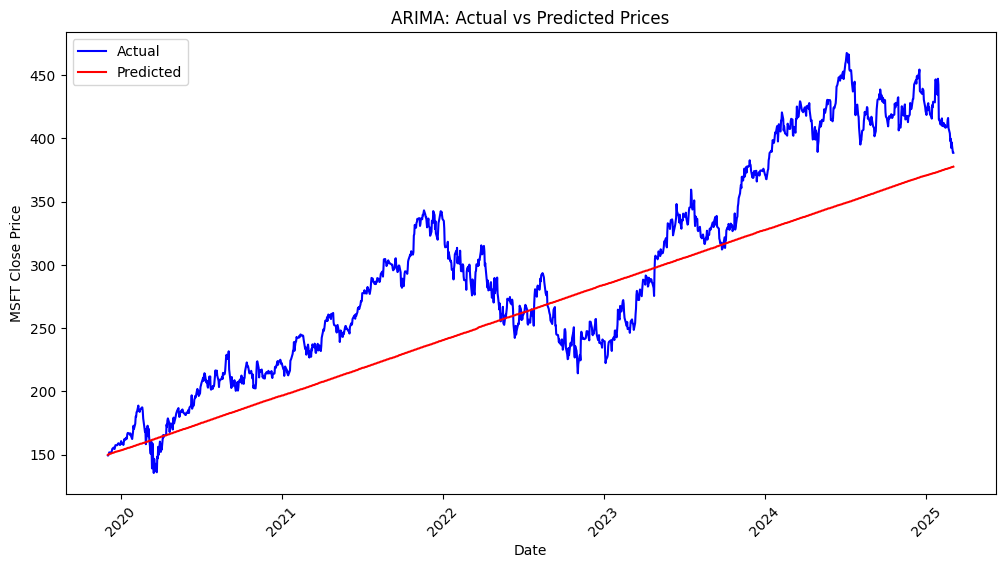

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


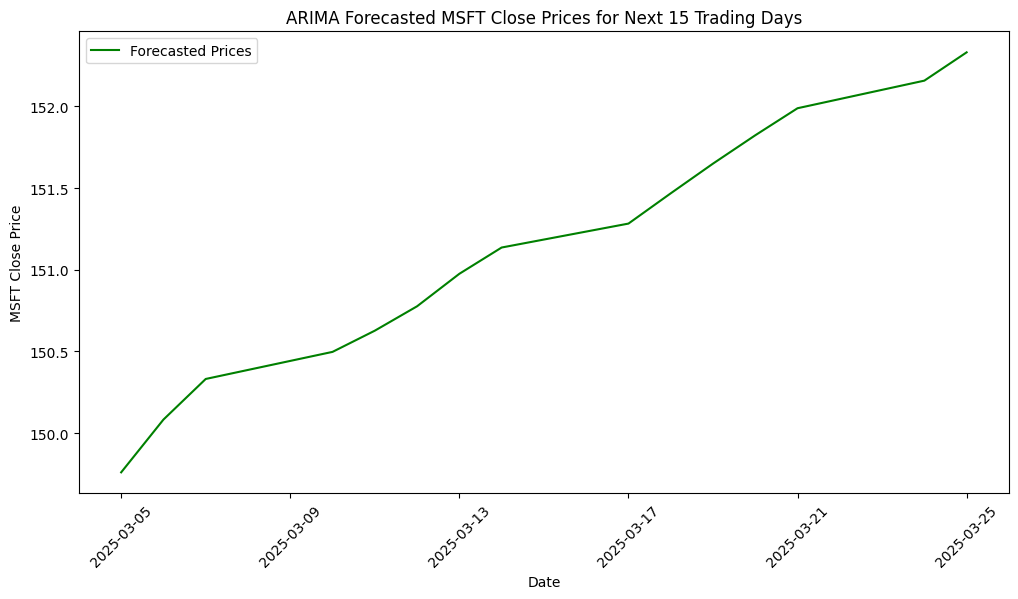

In [79]:
data_msft = msft_filtered.copy()
data = data_msft.loc[:, ~data_msft.columns.str.contains('NVDA')]
data['date'] = pd.to_datetime(data['date'])
data['date_unix'] = data['date'].astype('int64') // 10**9

# Split data into train and test
split_date = np.quantile(data['date_unix'], 0.8)
train_data = data[data['date_unix'] <= split_date]
test_data = data[data['date_unix'] > split_date]

# Scale the data
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_data[['MSFT_close']])
test_scaled = scaler.transform(test_data[['MSFT_close']])

train_series = pd.Series(train_scaled.flatten(), index=train_data['date'])
test_series = pd.Series(test_scaled.flatten(), index=test_data['date'])

# ARIMA Model
order = (8, 2, 9)
model_arima = ARIMA(train_series, order=order)
model_arima_fit = model_arima.fit()

# Predictions
predictions_arima_scaled = model_arima_fit.forecast(steps=len(test_series))
predictions_arima = scaler.inverse_transform(predictions_arima_scaled.values.reshape(-1, 1)).flatten()
actual_arima = scaler.inverse_transform(test_series.values.reshape(-1, 1)).flatten()

# RMSE
rmse_arima = np.sqrt(mean_squared_error(actual_arima, predictions_arima))
print(f'ARIMA Test RMSE: {rmse_arima}')

# Plot Actual vs Predicted
plt.figure(figsize=(12, 6))
sns.lineplot(x=test_series.index, y=actual_arima, label='Actual', color='blue')
sns.lineplot(x=test_series.index, y=predictions_arima, label='Predicted', color='red')
plt.xlabel("Date")
plt.ylabel("MSFT Close Price")
plt.title("ARIMA: Actual vs Predicted Prices")
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Forecast the next 15 trading days
forecast_arima_scaled = model_arima_fit.forecast(steps=15)
forecast_arima = scaler.inverse_transform(forecast_arima_scaled.values.reshape(-1, 1)).flatten()

last_date = test_series.index[-1]
date_range_arima = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=15, freq='B')

# Plot forecasted prices
plt.figure(figsize=(12, 6))
sns.lineplot(x=date_range_arima, y=forecast_arima, label='Forecasted Prices', color='green')
plt.xlabel("Date")
plt.ylabel("MSFT Close Price")
plt.title("ARIMA Forecasted MSFT Close Prices for Next 15 Trading Days")
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [83]:
# Create a DataFrame for Arima forecasted prices and save it as a CSV file.
arima_msft_forecast = pd.DataFrame({'Date': date_range_arima, 'Forecasted Close Price': forecast_arima})
print(arima_msft_forecast)
arima_msft_forecast.to_csv('arima_msft_forecast.csv', index=False)

         Date  Forecasted Close Price
0  2025-03-05              149.760114
1  2025-03-06              150.083149
2  2025-03-07              150.331740
3  2025-03-10              150.497543
4  2025-03-11              150.627355
5  2025-03-12              150.776707
6  2025-03-13              150.975573
7  2025-03-14              151.136392
8  2025-03-17              151.282850
9  2025-03-18              151.468114
10 2025-03-19              151.649989
11 2025-03-20              151.823465
12 2025-03-21              151.989047
13 2025-03-24              152.157952
14 2025-03-25              152.331187


## Evaluation and Comparison of Forecasting Models for Microsoft Stock Prices

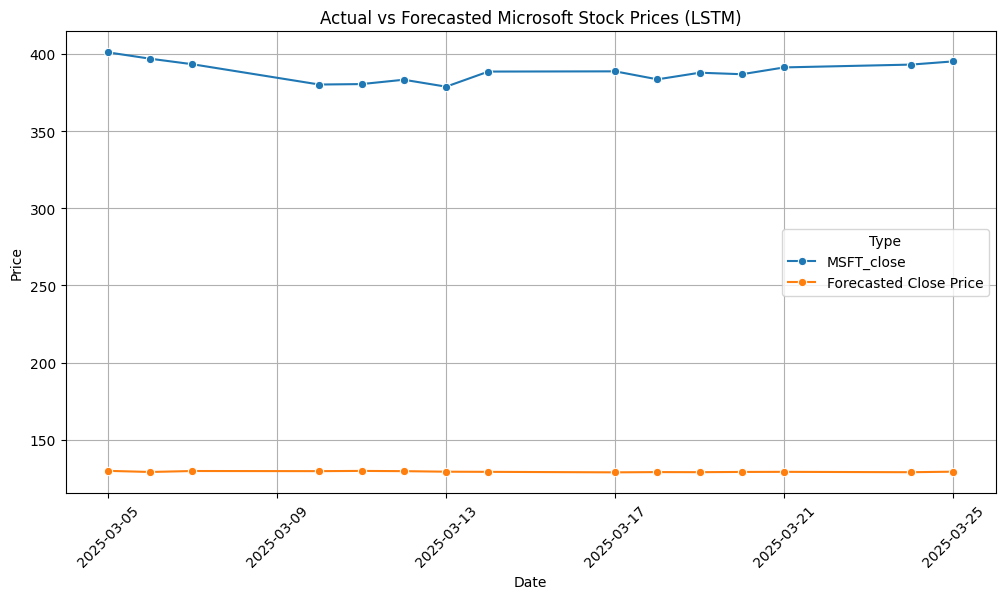

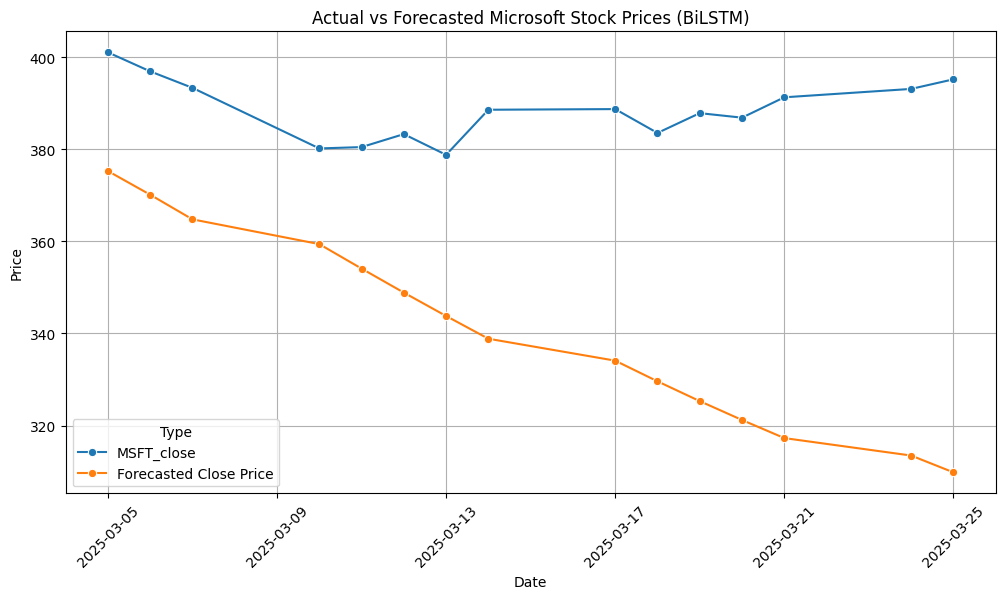

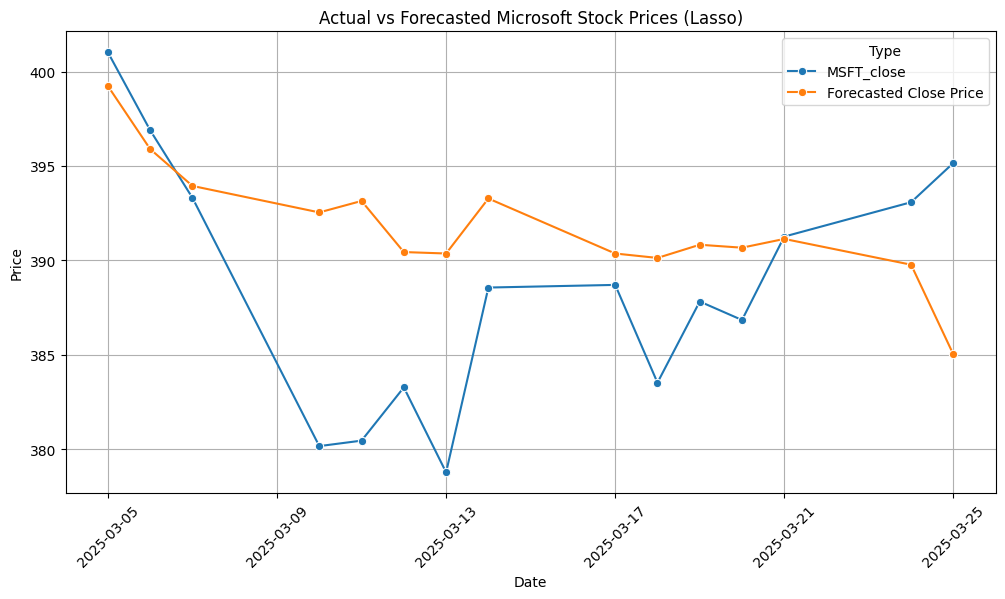

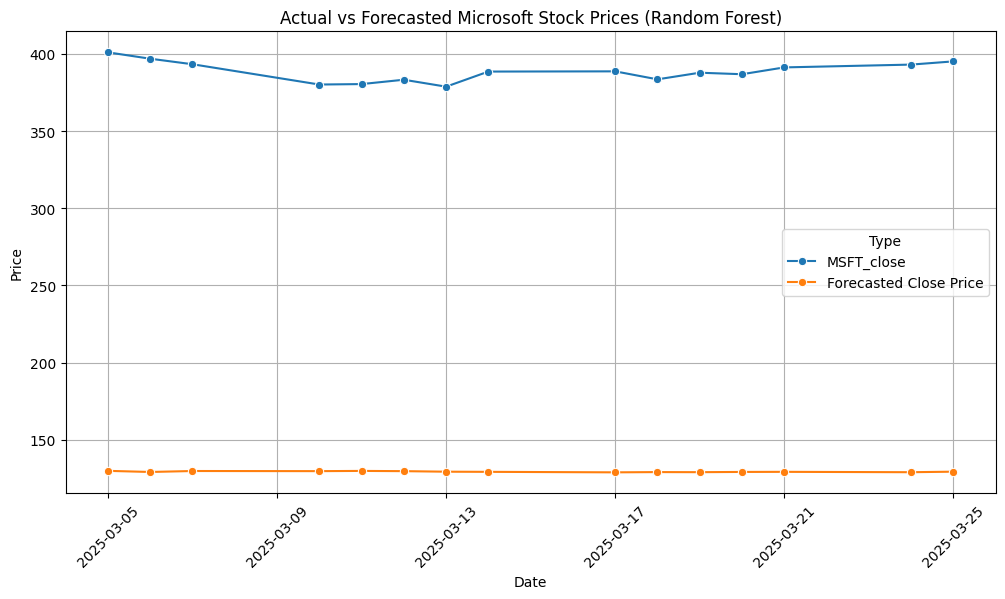

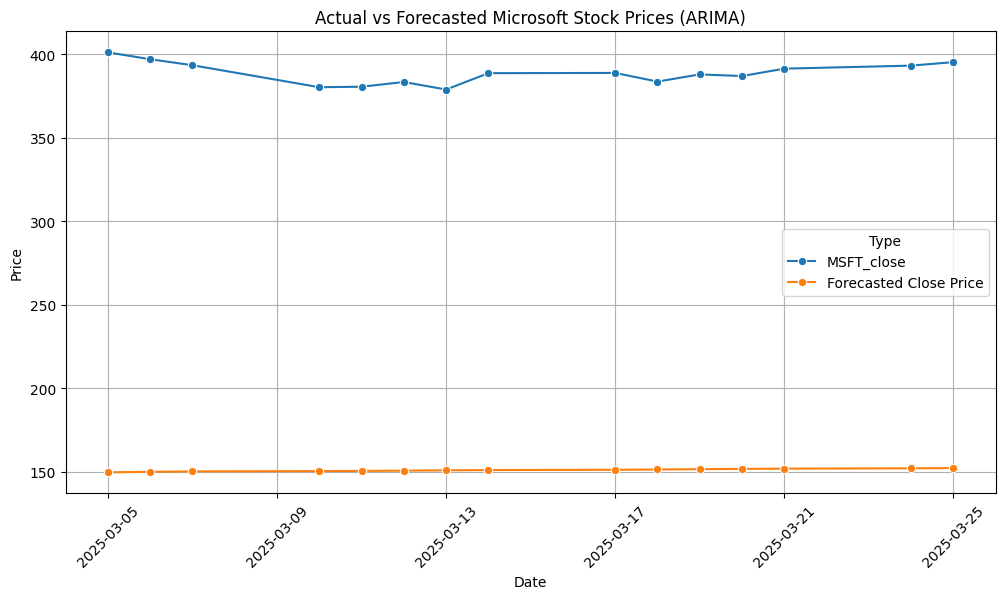

           Model  Pearson Correlation  Spearman Correlation        RMSE  \
0           LSTM            -0.049535             -0.057143  259.396330   
1         BiLSTM             0.082550              0.014286   52.528512   
2          Lasso             0.326509              0.246429    6.885725   
3  Random Forest            -0.049535             -0.057143  259.396330   
4          ARIMA            -0.071868             -0.014286  237.549176   

          MAE        MAPE  
0  259.317663  200.604515  
1   48.190387   14.562996  
2    5.377547    1.375676  
3  259.317663  200.604515  
4  237.461255  157.135921  


In [85]:
# Load actual stock prices
msft_march_prices = pd.read_csv("/content/MSFT_march_prices.csv")

# List of forecast dataframes to compare
forecast_dfs = {
    "LSTM": lstm_msft_forecast,
    "BiLSTM": bilstm_msft_forecast,
    "Lasso Regression": lasso_msft_forecast,
    "Random Forest": rf_msft_forecast,
    "ARIMA": arima_msft_forecast
}

results = []

for model_name, forecast_df in forecast_dfs.items():
    msft_forecast = pd.concat([forecast_df, msft_march_prices['MSFT_close']], axis=1)
    pearson_corr, pearson_p = pearsonr(msft_forecast['Forecasted Close Price'], msft_forecast['MSFT_close'])
    spearman_corr, spearman_p = spearmanr(msft_forecast['Forecasted Close Price'], msft_forecast['MSFT_close'])

    # Compute error metrics
    rmse = np.sqrt(np.mean((msft_forecast['MSFT_close'] - msft_forecast['Forecasted Close Price']) ** 2))
    mae = np.mean(np.abs(msft_forecast['MSFT_close'] - msft_forecast['Forecasted Close Price']))
    mape = np.mean(np.abs((msft_forecast['MSFT_close'] - msft_forecast['Forecasted Close Price']) / msft_forecast['Forecasted Close Price'])) * 100

    results.append([model_name, pearson_corr, spearman_corr, rmse, mae, mape])
    melted_df = msft_forecast.melt(id_vars=['Date'],
                                   value_vars=['MSFT_close', 'Forecasted Close Price'],
                                   var_name='Type',
                                   value_name='Price')

    # Plot actual vs forecasted prices
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=melted_df, x='Date', y='Price', hue='Type', marker='o')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(f'Actual vs Forecasted Microsoft Stock Prices ({model_name})')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()
results_df = pd.DataFrame(results, columns=['Model', 'Pearson Correlation', 'Spearman Correlation', 'RMSE', 'MAE', 'MAPE'])
print(results_df)